In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
def sep( n: int = 80, sep: str = "="):
    print(sep*n)

def new_section(string: str, n: int = 80, sep: str = "="):
    m = len(string)
    if n < m:
        n = m + 6
    padding = (n-m+1)//2
    print(sep*padding + " " + string + " " + sep*padding)


# Data

O CQI (Coffee Quality Institute) mantém um banco de dados na web que serve como recurso para profissionais do café e entusiastas interessados em aprender sobre a qualidade do café e sustentabilidade. O banco de dados inclui uma variedade de informações sobre produção, processamento e avaliação sensorial do café. Ele também contém dados sobre genética do café, tipos de solo e outros fatores que podem afetar a qualidade do café.

https://www.kaggle.com/datasets/adampq/coffee-quality-with-locations-of-origin/data

https://database.coffeeinstitute.org/


# Campos
**REC_ID**: Refere-se ao ID único do banco de dados.

**Species**: Refere-se à espécie botânica dos grãos de café, como Arábica ou Robusta.

**Continent.of.Origin**: Refere-se ao continente de origem para o respectivo lote de café.

**Country.of.Origin**: Refere-se ao país de origem para o respectivo lote de café.

**Harvest.Year**: Refere-se ao ano de colheita para o respectivo lote de café.

**Expiration**: Refere-se à data de validade atribuída para o respectivo lote de café.

**Variety**: Refere-se ao cultivar específico ou tipo de planta de café da qual os grãos são colhidos.

**Color**: Refere-se à cor observada do grão de café cru. Tipicamente azul, verde ou misturado.

**Processing.Method**: Descreve o método utilizado para processar os grãos de café após a colheita.

**Aroma**: Refere-se ao cheiro ou fragrância do café.

**Flavor**: Avaliado com base no sabor, incluindo qualquer doçura, amargor, acidez e outras notas de sabor.

**Aftertaste**: Refere-se ao sabor persistente que permanece na boca após engolir o café.

**Acidity**: Refere-se à vivacidade ou brilho do sabor.

**Body**: Refere-se à espessura ou viscosidade do café na boca.

**Balance**: Refere-se a quão bem os diferentes componentes do sabor do café trabalham juntos.

**Uniformity**: Refere-se à consistência do café de xícara para xícara.

**Clean.Cup**: Refere-se a um café que está livre de quaisquer sabores estranhos ou defeitos, como azedume, mofo ou velhice.

**Sweetness**: Refere-se à paleta de doçura oferecida pelo seu sabor.

**Moisture**: Representa o teor de umidade dos grãos de café, normalmente medido como uma porcentagem.

**Quakers**: Indica a presença de grãos quakers, que são grãos imaturos ou defeituosos que não torram adequadamente.

**Category.One.Defects**: Refere-se ao número total de defeitos de primeiro nível, como grãos pretos ou azedos.

**Category.Two.Defects**: Refere-se ao número total de defeitos de segundo nível, incluindo defeitos mais graves como grãos mofados, danificados por insetos ou perfurados.

**Rec_Cnt** (Agrupado por conjuntos de dados apenas): Refere-se à contagem total de registros para cada um dos respectivos recipientes de localização.

In [3]:
coffee_quality = pd.read_csv("Coffee_Qlty.csv")

In [4]:
new_section("Coffee Quality Data")
print(coffee_quality.head())
sep()

=============================== Coffee Quality Data ===============================
   REC_ID  Species Continent.of.Origin Country.of.Origin  Harvest.Year  \
0       0  Arabica              Africa          Ethiopia        2014.0   
1       1  Arabica              Africa          Ethiopia        2014.0   
2       2  Arabica       North America         Guatemala           NaN   
3       3  Arabica              Africa          Ethiopia        2014.0   
4       4  Arabica              Africa          Ethiopia        2014.0   

  Expiration  Variety  Color Processing.Method  Aroma  ...  Acidity  Body  \
0   04/03/16      NaN  Green      Washed / Wet   8.67  ...     8.75  8.50   
1   04/03/16    Other  Green      Washed / Wet   8.75  ...     8.58  8.42   
2   05/31/11  Bourbon    NaN               NaN   8.42  ...     8.42  8.33   
3   03/25/16      NaN  Green     Natural / Dry   8.17  ...     8.42  8.50   
4   04/03/16    Other  Green      Washed / Wet   8.25  ...     8.50  8.42   

   Balan

In [5]:
new_section("Coffee Quality Data Columns")
print("Número de colunas: ", coffee_quality.shape[0])
print("Número de linhas: ", coffee_quality.shape[1])
print(coffee_quality.columns)
sep()

=========================== Coffee Quality Data Columns ===========================
Número de colunas:  1339
Número de linhas:  22
Index(['REC_ID', 'Species', 'Continent.of.Origin', 'Country.of.Origin',
       'Harvest.Year', 'Expiration', 'Variety', 'Color', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Quakers',
       'Category.One.Defects', 'Category.Two.Defects'],
      dtype='object')


In [6]:
new_section("Coffee Quality Data Balance and Description")
balance_stats = coffee_quality['Balance'].describe()
print(balance_stats)
sep()

=================== Coffee Quality Data Balance and Description ===================
count    1339.000000
mean        7.518013
std         0.408943
min         0.000000
25%         7.330000
50%         7.500000
75%         7.750000
max         8.750000
Name: Balance, dtype: float64


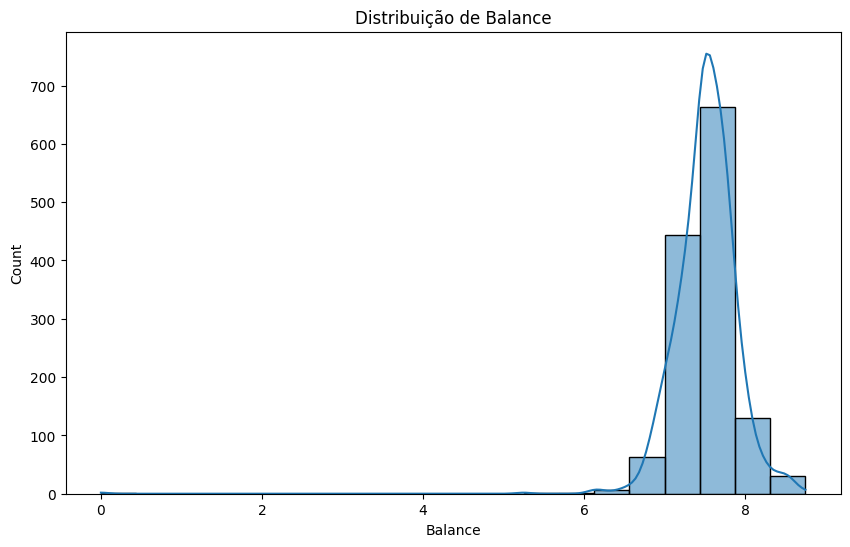

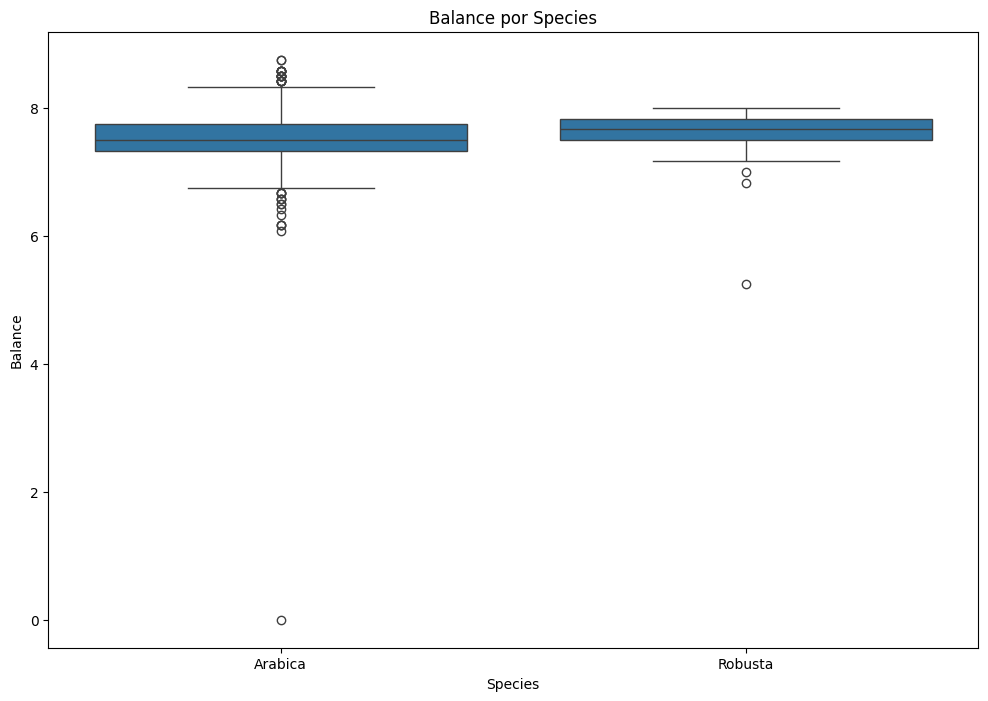

In [7]:
# Histograma de Balance
plt.figure(figsize=(10, 6))
sns.histplot(coffee_quality['Balance'], bins=20, kde=True)
plt.title('Distribuição de Balance')
plt.show()

# Boxplots para Balance por Species
plt.figure(figsize=(12, 8))
sns.boxplot(x='Species', y='Balance', data=coffee_quality)
plt.title('Balance por Species')
plt.show()

           Balance  Moisture
Balance   1.000000 -0.199843
Moisture -0.199843  1.000000


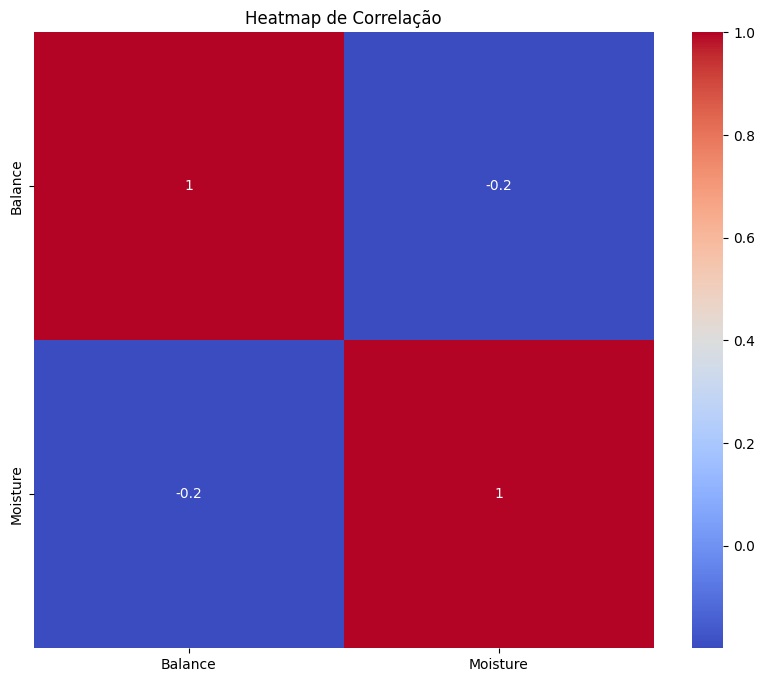

In [8]:
correlation = coffee_quality[['Balance', 'Moisture']].corr()
print(correlation)

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(coffee_quality[['Balance', 'Moisture']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

In [9]:
from scipy.stats import f_oneway

# ANOVA para Balance por Species
anova_result = f_oneway(*[coffee_quality[coffee_quality['Species'] == species]['Balance'] for species in coffee_quality['Species'].unique()])
print(f'ANOVA result for Species: {anova_result}')

ANOVA result for Species: F_onewayResult(statistic=0.09657345366078812, pvalue=0.7560294698298735)


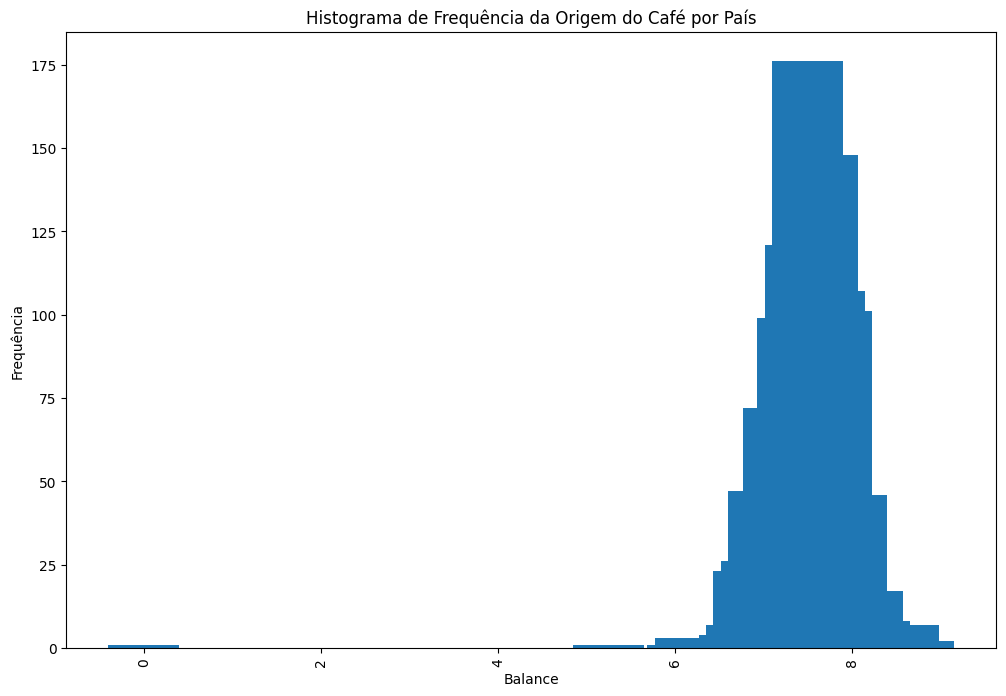

In [10]:
country_counts = coffee_quality["Balance"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Balance") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show() 

C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\3289040753.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality["Balance"], shade=True)  # shade=True preenche a área sob a curva


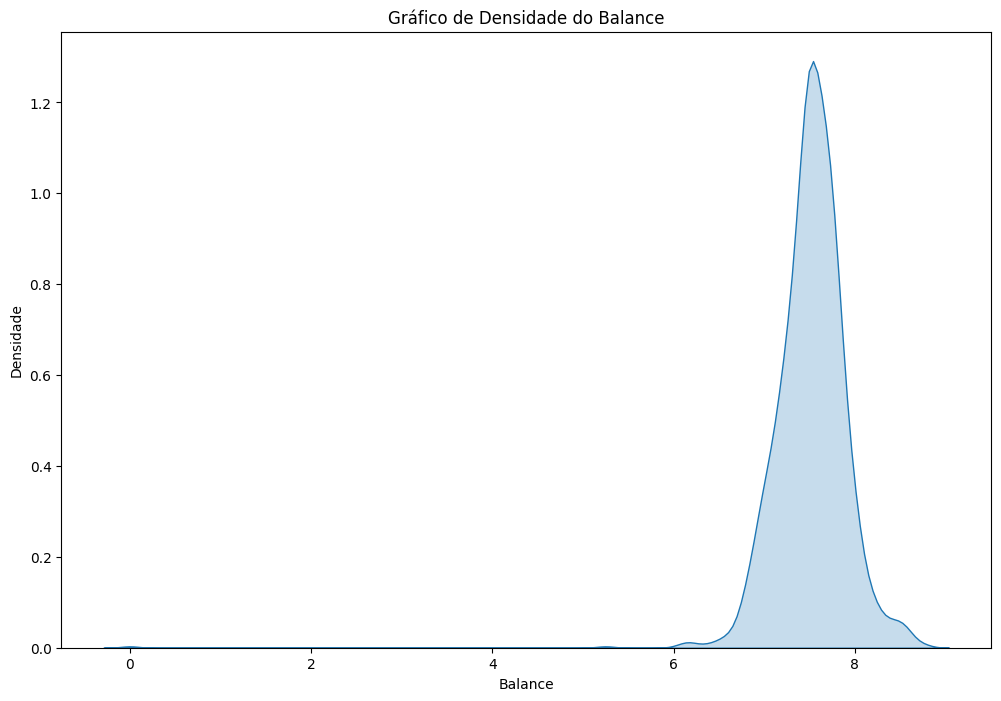

In [11]:
plt.figure(figsize=(12, 8))  
sns.kdeplot(coffee_quality["Balance"], shade=True)  # shade=True preenche a área sob a curva
plt.xlabel("Balance") 
plt.ylabel("Densidade") 
plt.title("Gráfico de Densidade do Balance")  
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2976154249.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=specie, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2976154249.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=specie, shade=True)


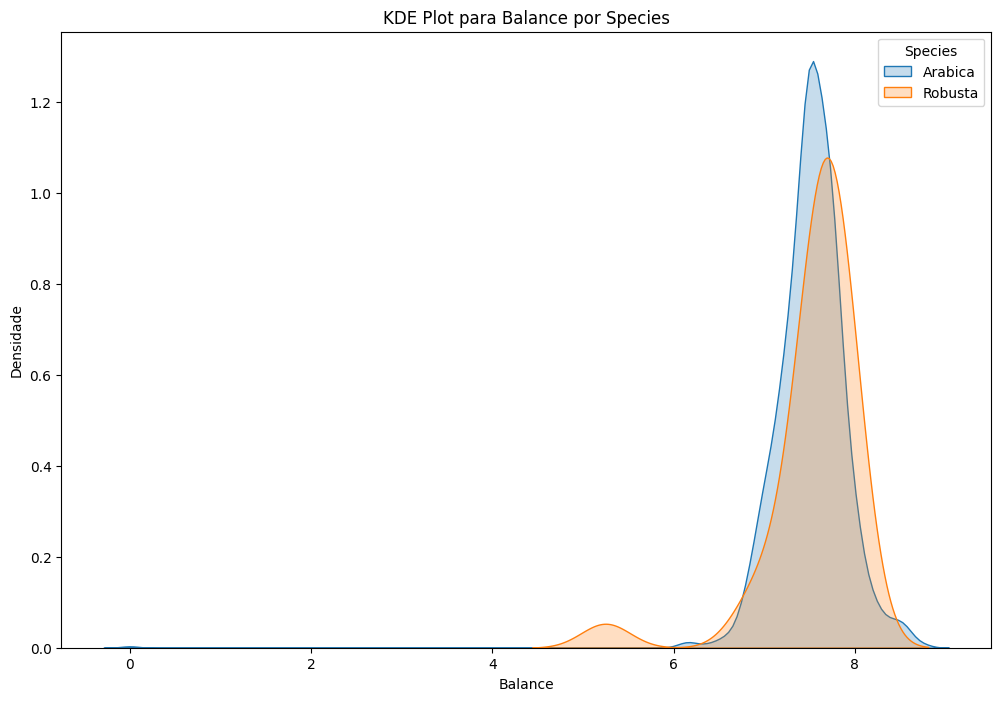

In [12]:
plt.figure(figsize=(12, 8))
for specie in coffee_quality['Species'].unique():
    subset = coffee_quality[coffee_quality['Species'] == specie]
    sns.kdeplot(subset['Balance'], label=specie, shade=True)
plt.xlabel('Balance')
plt.ylabel('Densidade')
plt.title('KDE Plot para Balance por Species')
plt.legend(title='Species')
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\252536542.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\252536542.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])


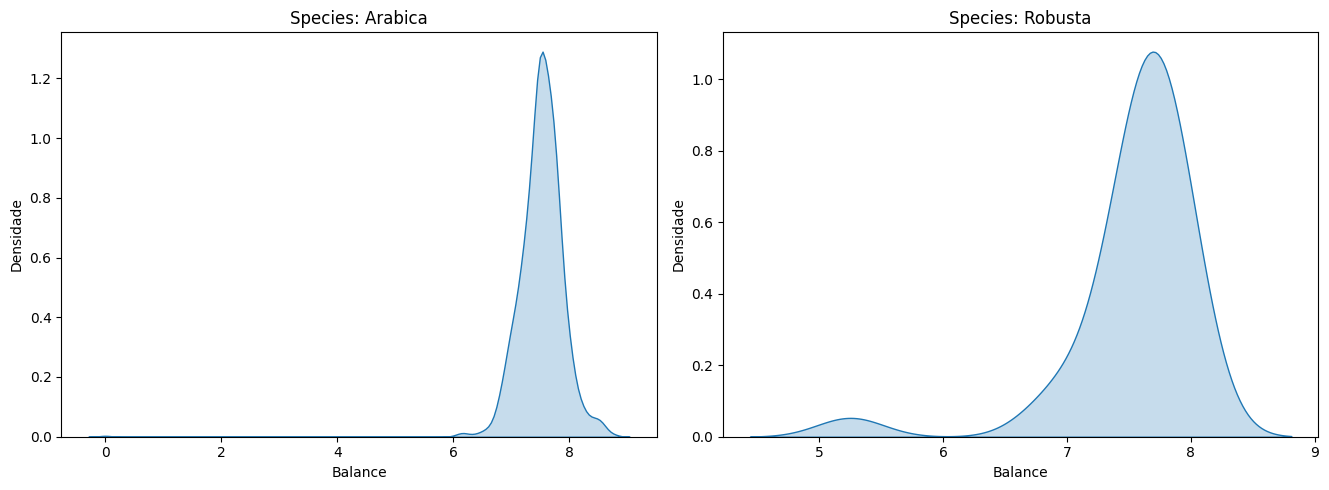

In [13]:
species_list = coffee_quality['Species'].unique()
num_species = len(species_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_species + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, specie in enumerate(species_list):
    subset = coffee_quality[coffee_quality['Species'] == specie]
    sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
    axes[i].set_title(f'Species: {specie}')
    axes[i].set_xlabel('Balance')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\613254510.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\613254510.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\613254510.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\613254510.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will bec

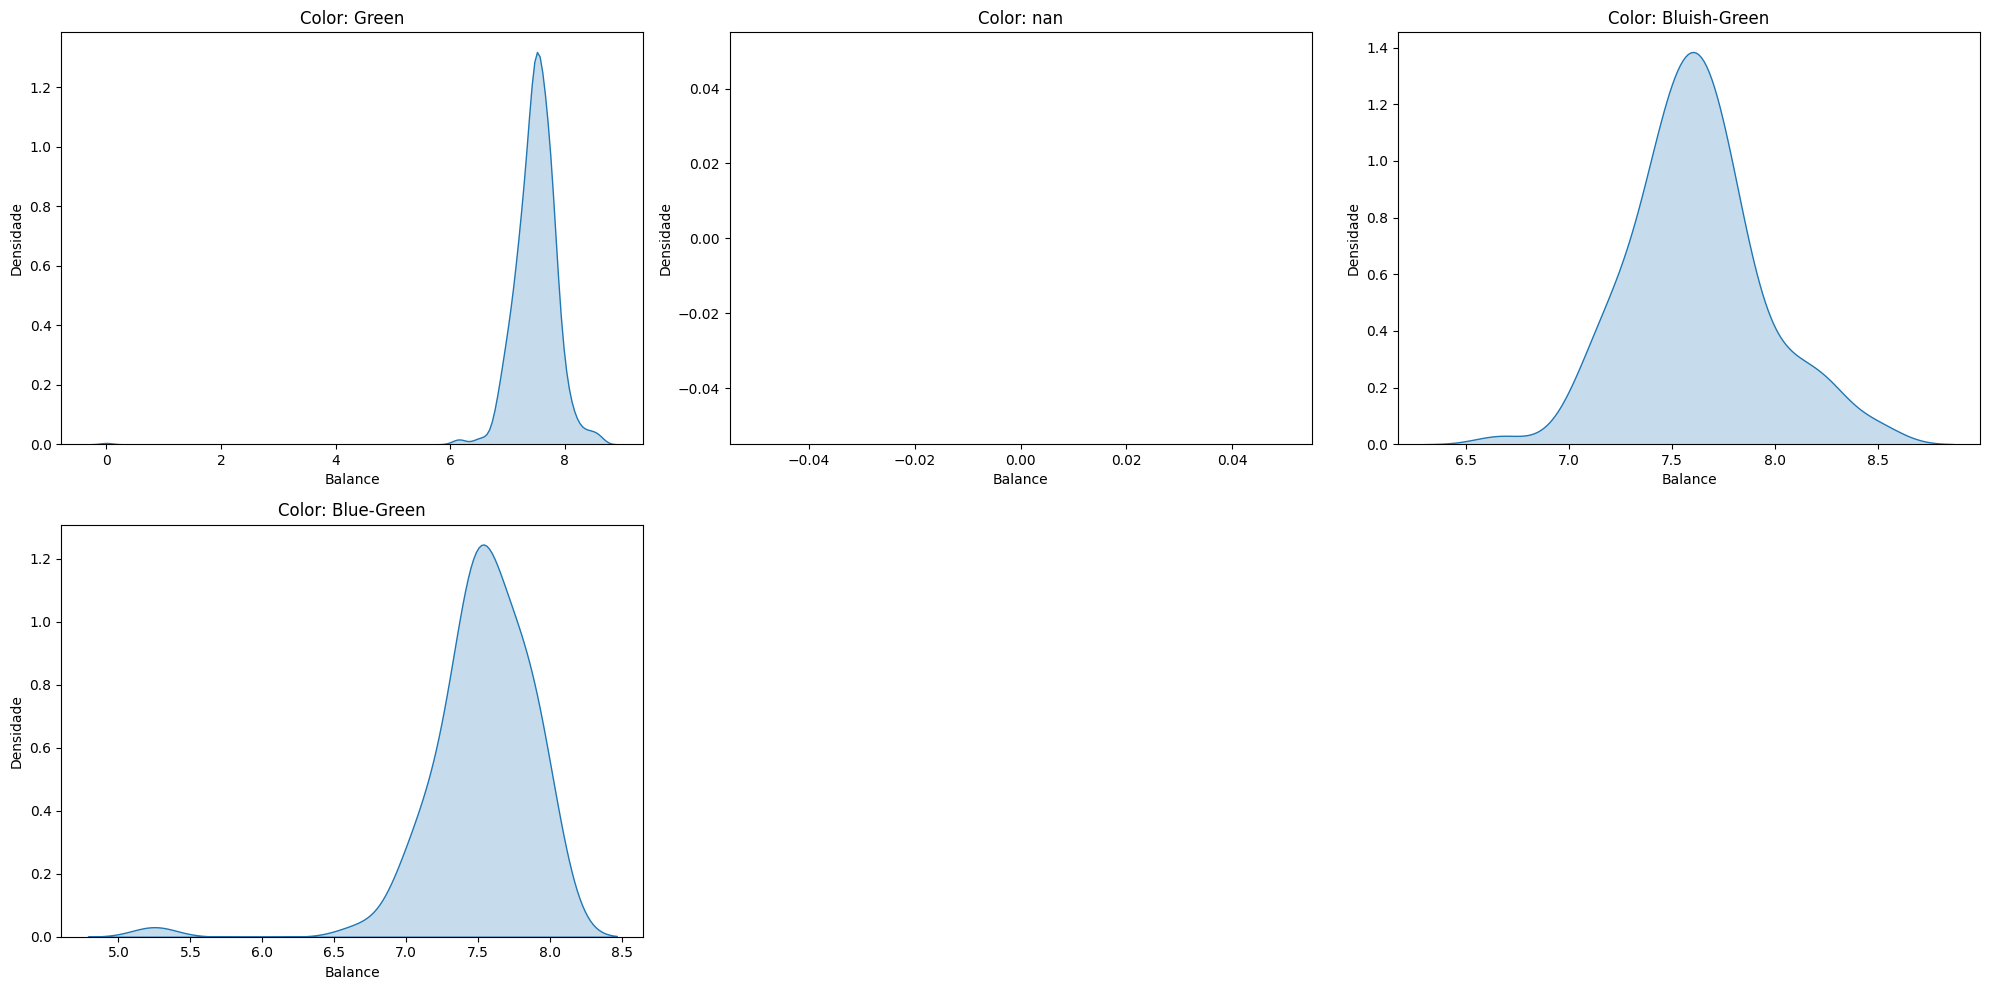

In [14]:

color_list = coffee_quality['Color'].unique()
num_colors = len(color_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_colors + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, color in enumerate(color_list):
    subset = coffee_quality[coffee_quality['Color'] == color]
    sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
    axes[i].set_title(f'Color: {color}')
    axes[i].set_xlabel('Balance')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1478714206.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1478714206.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1478714206.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=color, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1478714206.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will 

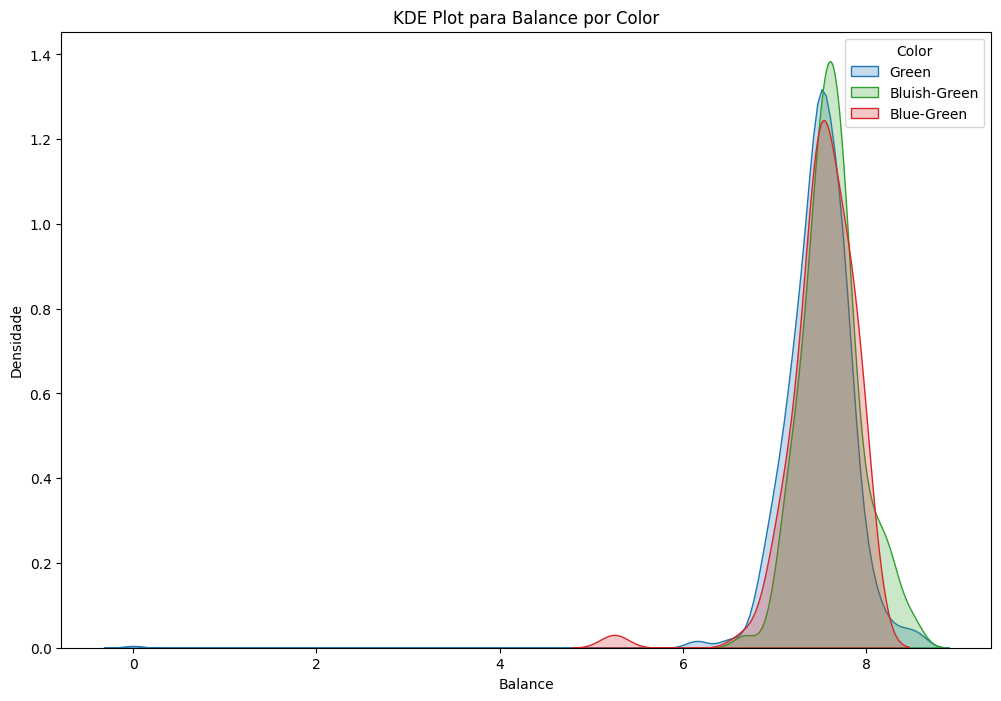

In [15]:
plt.figure(figsize=(12, 8))
for color in coffee_quality['Color'].unique():
    subset = coffee_quality[coffee_quality['Color'] == color]
    sns.kdeplot(subset['Balance'], label=color, shade=True)
plt.xlabel('Balance')
plt.ylabel('Densidade')
plt.title('KDE Plot para Balance por Color')
plt.legend(title='Color')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\3035555675.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality['Moisture'], shade=True)


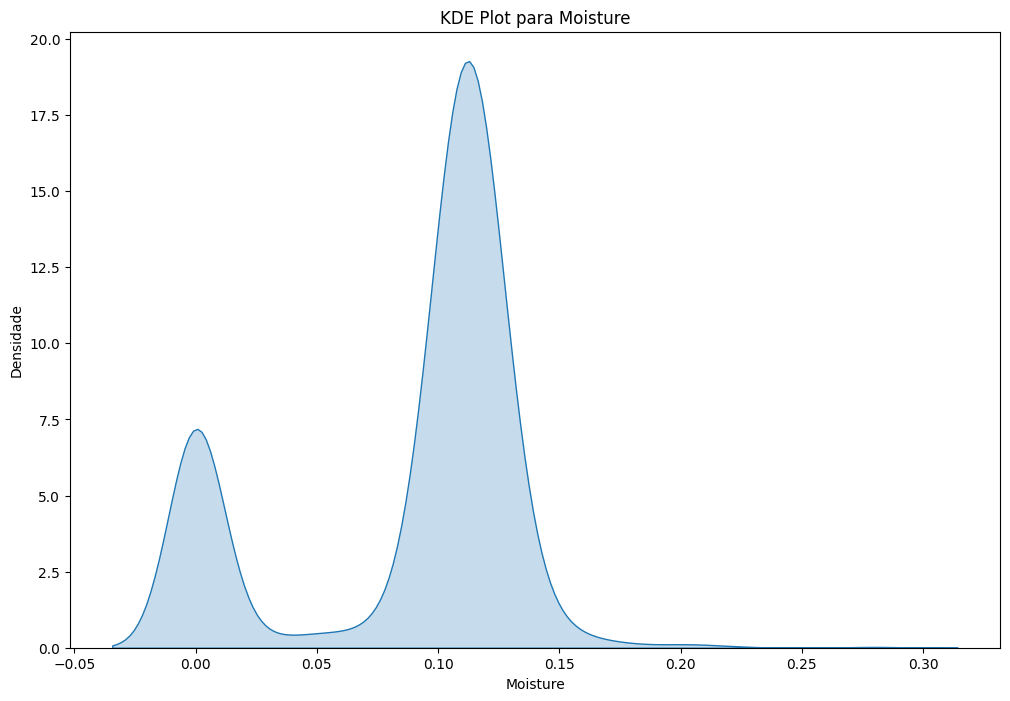

In [16]:
plt.figure(figsize=(12, 8))
sns.kdeplot(coffee_quality['Moisture'], shade=True)
plt.xlabel('Moisture')
plt.ylabel('Densidade')
plt.title('KDE Plot para Moisture')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2643776591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2643776591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2643776591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2643776591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This

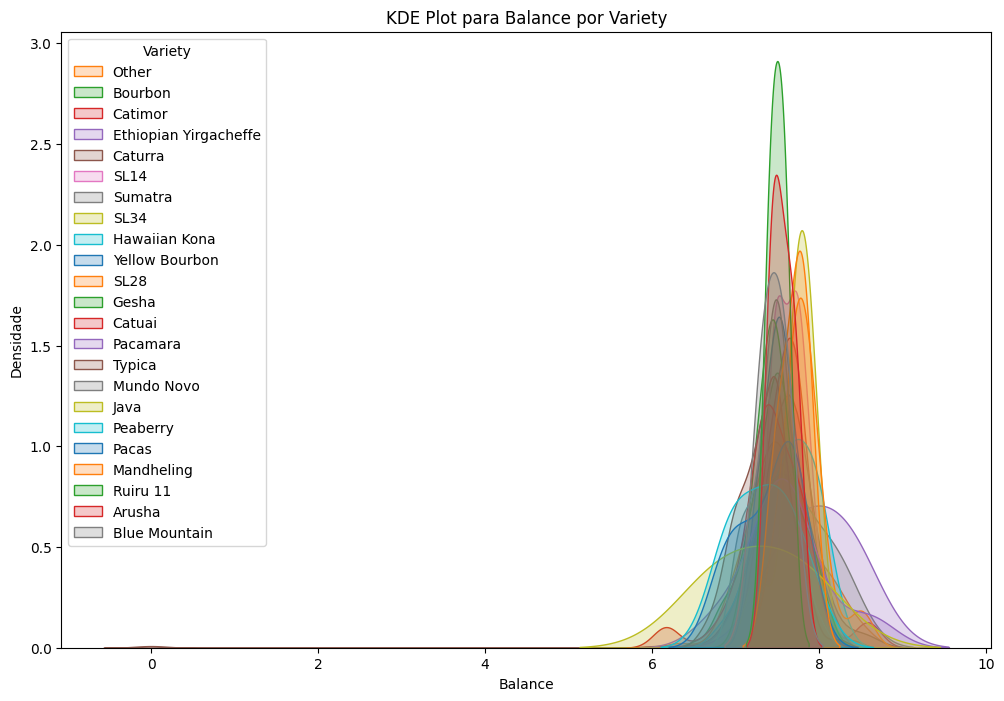

In [17]:
plt.figure(figsize=(12, 8))
for variety in coffee_quality['Variety'].unique():
    subset = coffee_quality[coffee_quality['Variety'] == variety]
    sns.kdeplot(subset['Balance'], label=variety, shade=True)
plt.xlabel('Balance')
plt.ylabel('Densidade')
plt.title('KDE Plot para Balance por Variety')
plt.legend(title='Variety')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1023116616.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1023116616.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1023116616.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\1023116616.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will

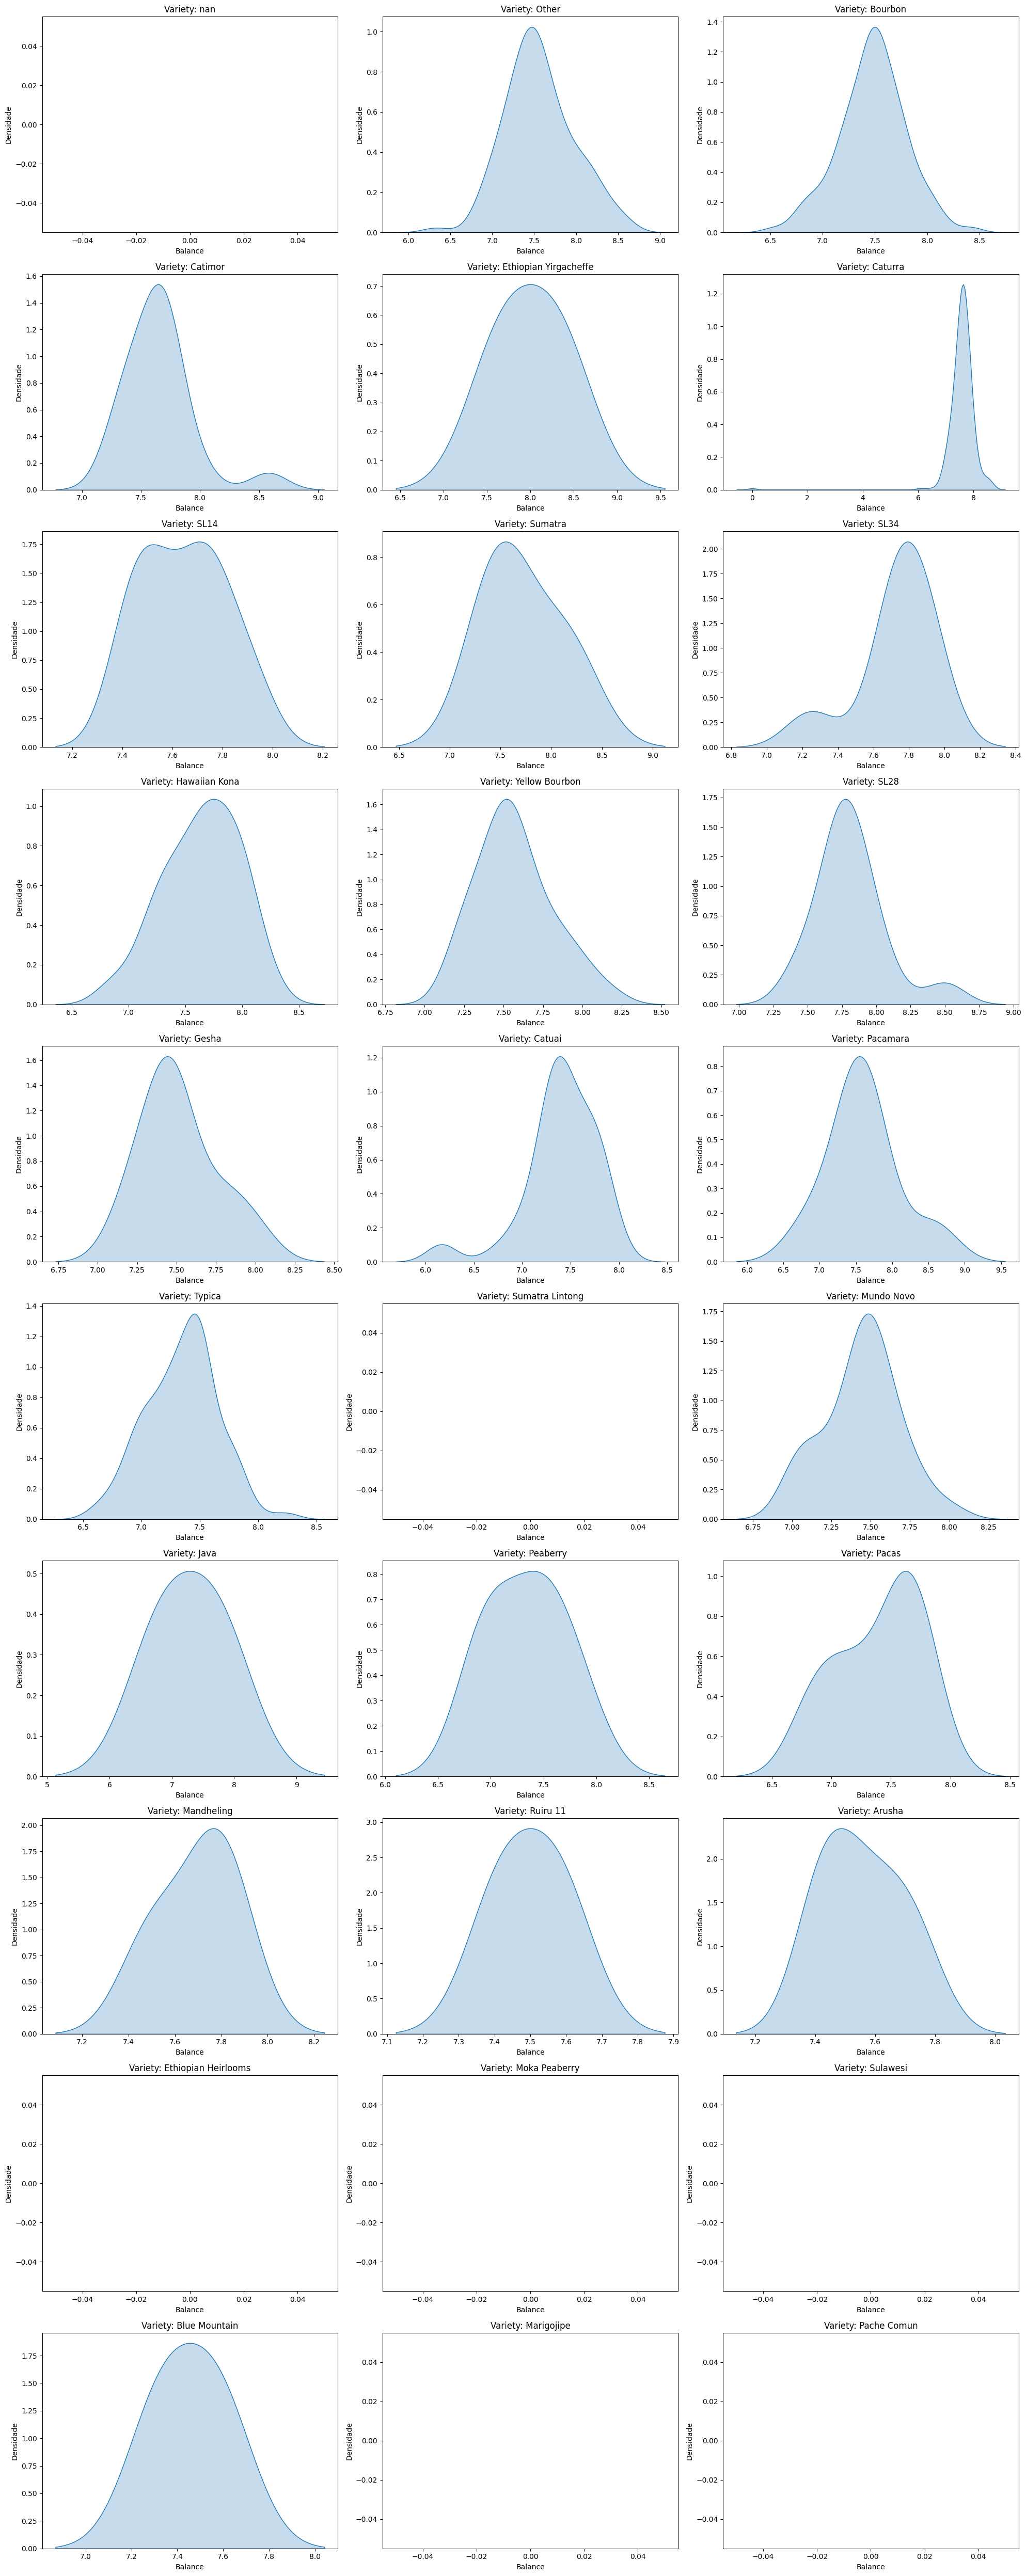

In [18]:

variety_list = coffee_quality['Variety'].unique()
num_varieties = len(variety_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_varieties + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, variety in enumerate(variety_list):
    subset = coffee_quality[coffee_quality['Variety'] == variety]
    sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
    axes[i].set_title(f'Variety: {variety}')
    axes[i].set_xlabel('Balance')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\3889488424.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\3889488424.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\3889488424.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\3889488424.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This

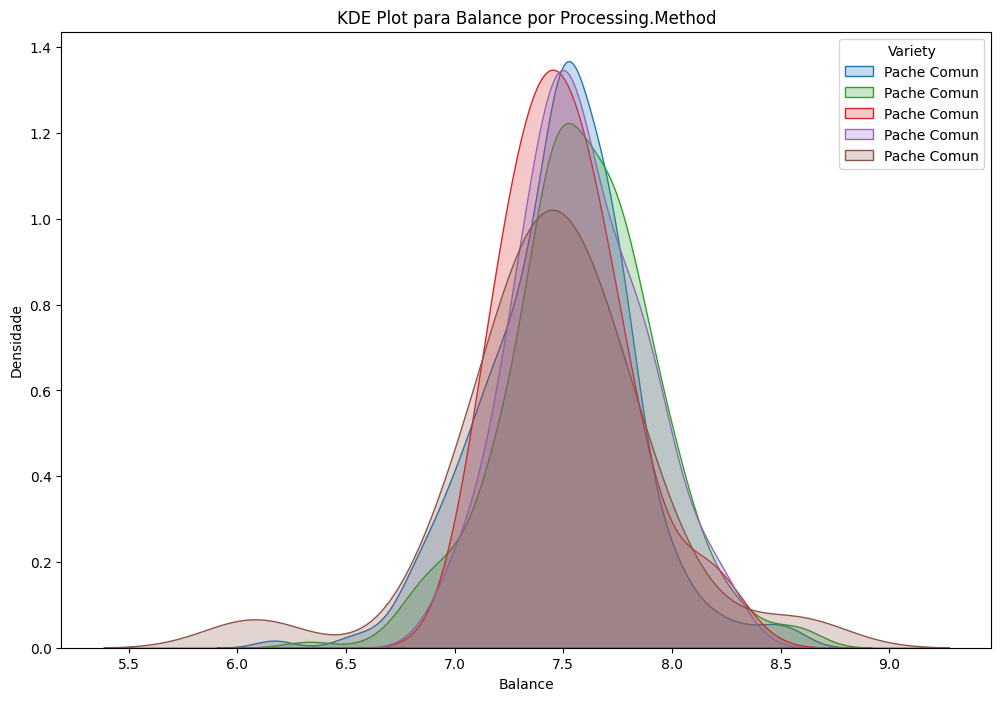

In [19]:
plt.figure(figsize=(12, 8))
for Processing_Method in coffee_quality['Processing.Method'].unique():
    subset = coffee_quality[coffee_quality['Processing.Method'] == Processing_Method]
    sns.kdeplot(subset['Balance'], label=variety, shade=True)
plt.xlabel('Balance')
plt.ylabel('Densidade')
plt.title('KDE Plot para Balance por Processing.Method')
plt.legend(title='Variety')
plt.show()


C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2866976556.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2866976556.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2866976556.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_7180\2866976556.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will

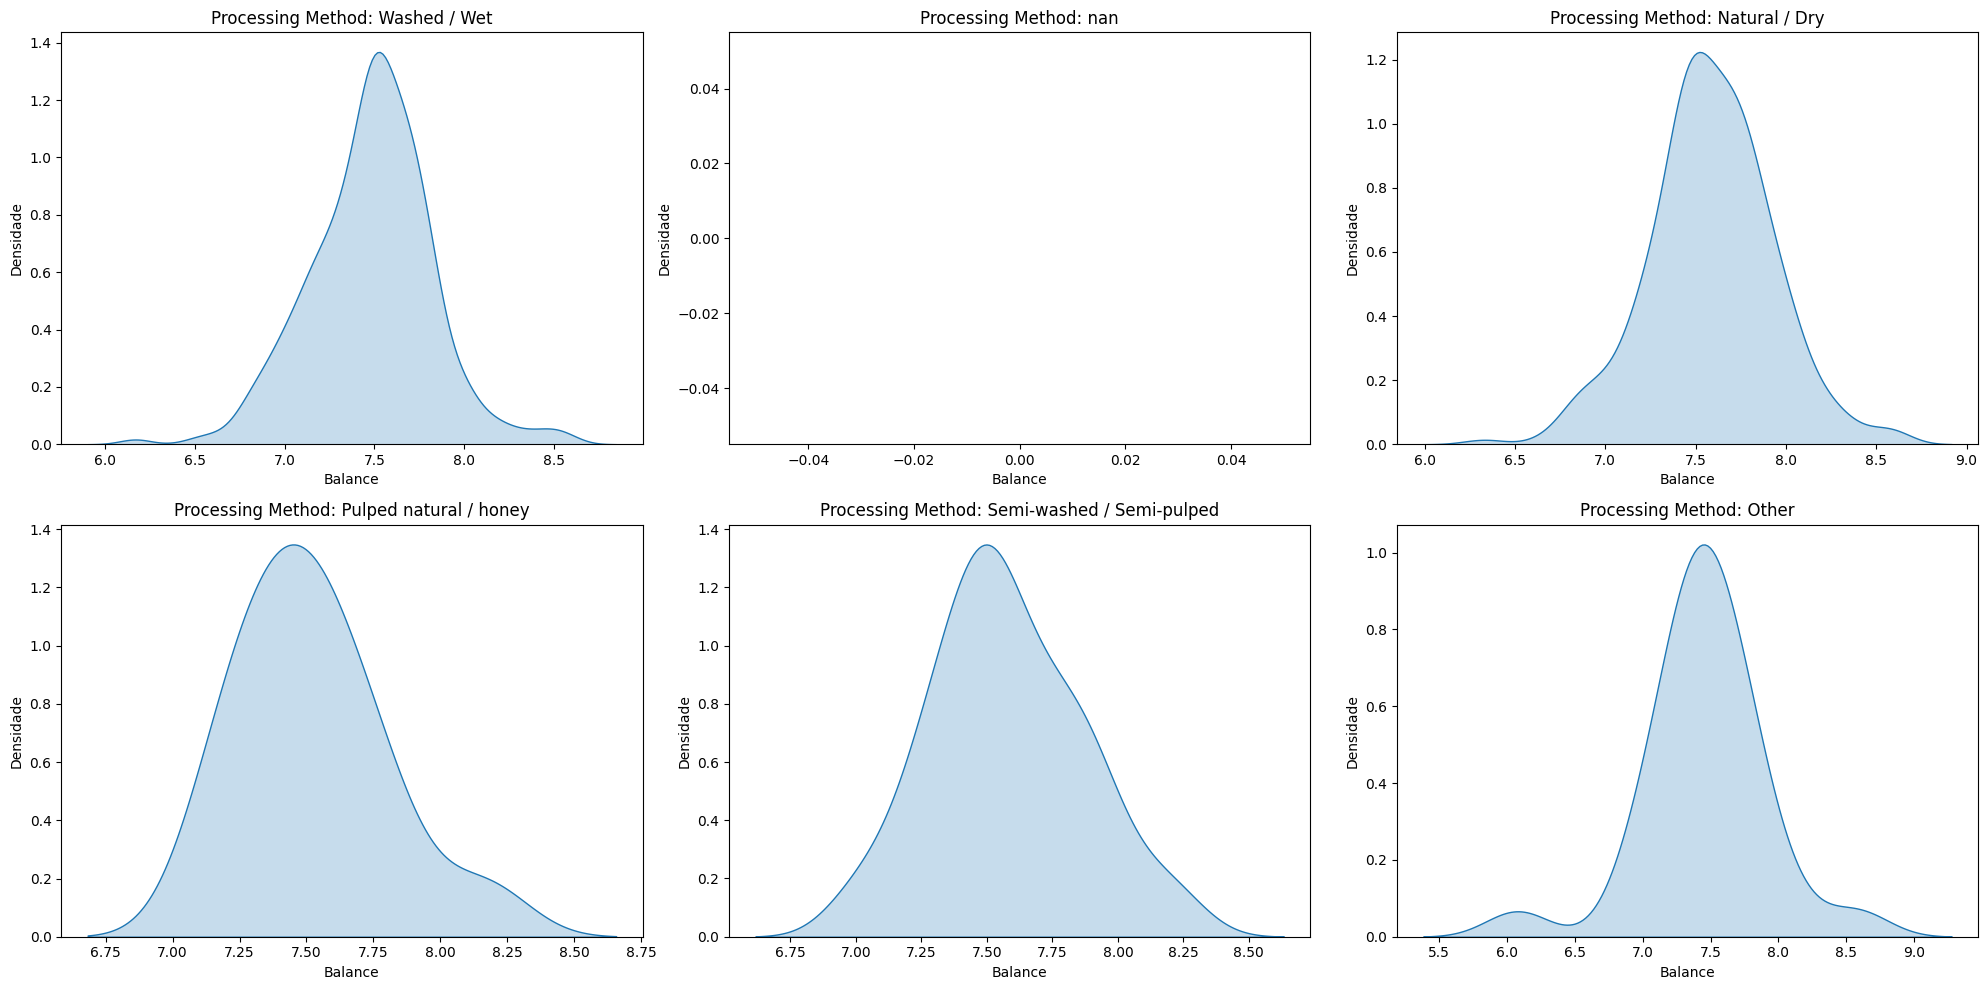

In [20]:
method_list = coffee_quality['Processing.Method'].unique()
num_methods = len(method_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_methods + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, method in enumerate(method_list):
    subset = coffee_quality[coffee_quality['Processing.Method'] == method]
    sns.kdeplot(subset['Balance'], shade=True, ax=axes[i])
    axes[i].set_title(f'Processing Method: {method}')
    axes[i].set_xlabel('Balance')
    axes[i].set_ylabel('Densidade')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

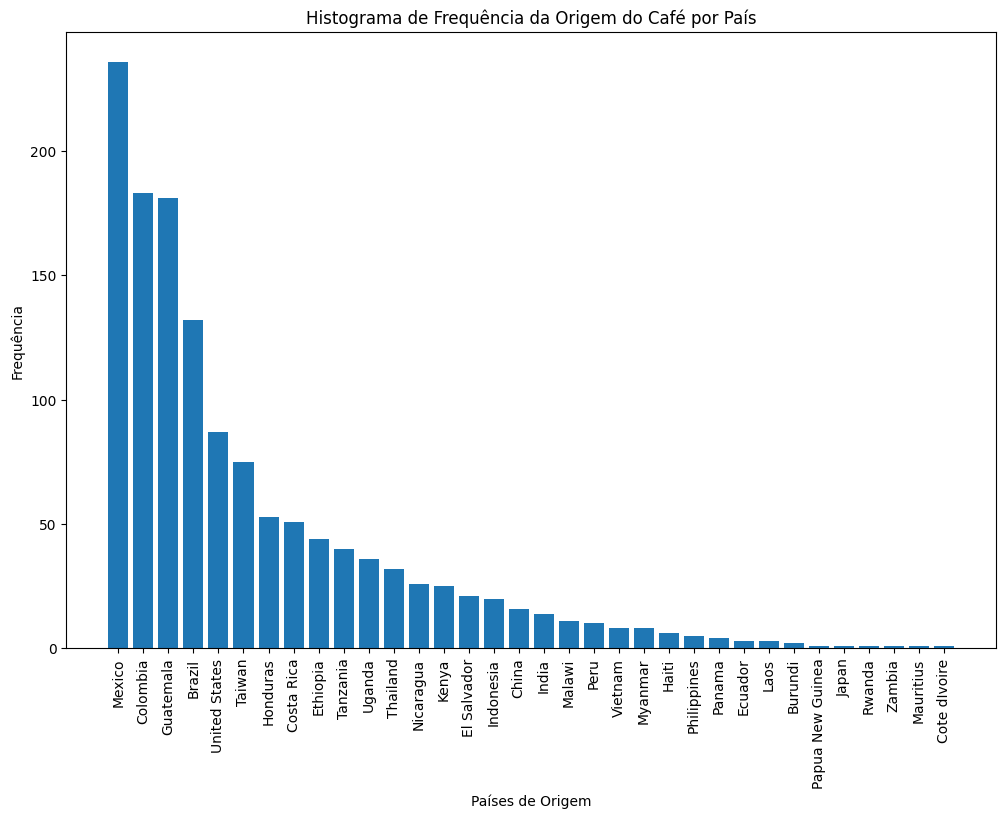

In [21]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show() 

In [22]:
countries = coffee_quality["Country.of.Origin"].unique()
new_section("Unique Countries")
print(len(countries))
print(countries)
sep()

================================ Unique Countries ================================
35
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States' 'Indonesia'
 'China' 'Costa Rica' 'Mexico' 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua'
 'Tanzania' 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea'
 'El Salvador' 'Japan' 'Ecuador' 'Haiti' 'Burundi' 'Vietnam' 'Philippines'
 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar' 'Mauritius' 'Cote dIvoire'
 nan 'India']


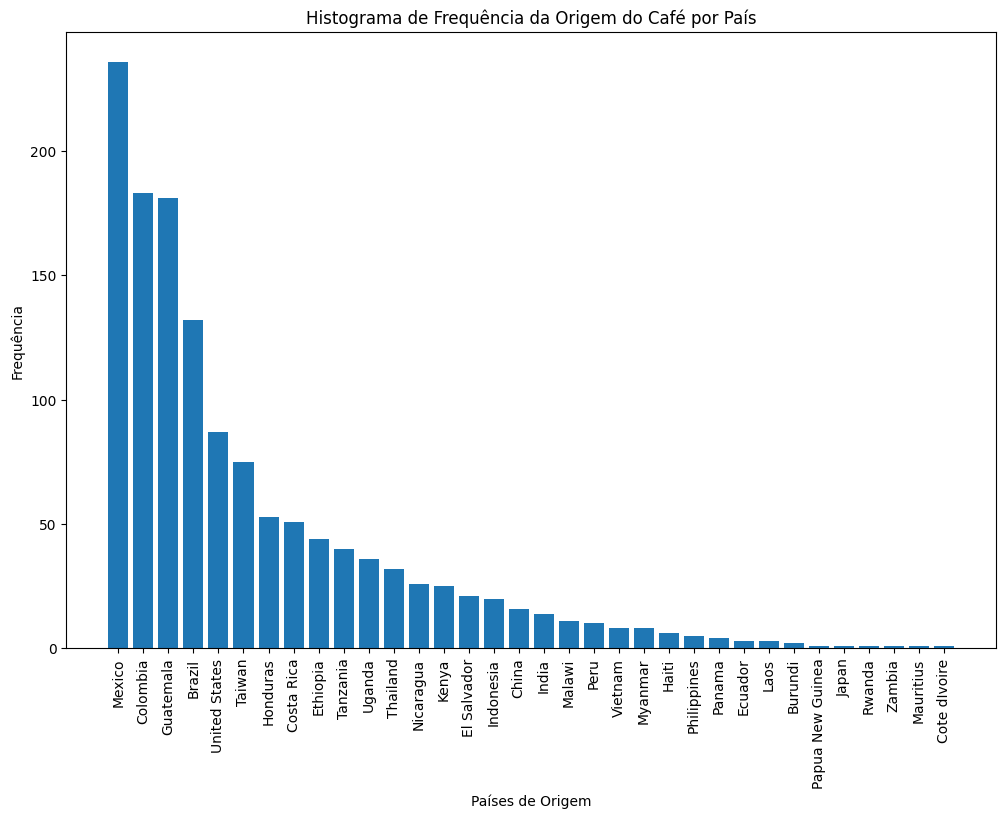

In [23]:
country_counts = coffee_quality["Country.of.Origin"].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values) 
plt.xlabel("Países de Origem") 
plt.ylabel("Frequência") 
plt.xticks(rotation=90)  
plt.title("Histograma de Frequência da Origem do Café por País")  
plt.show()  

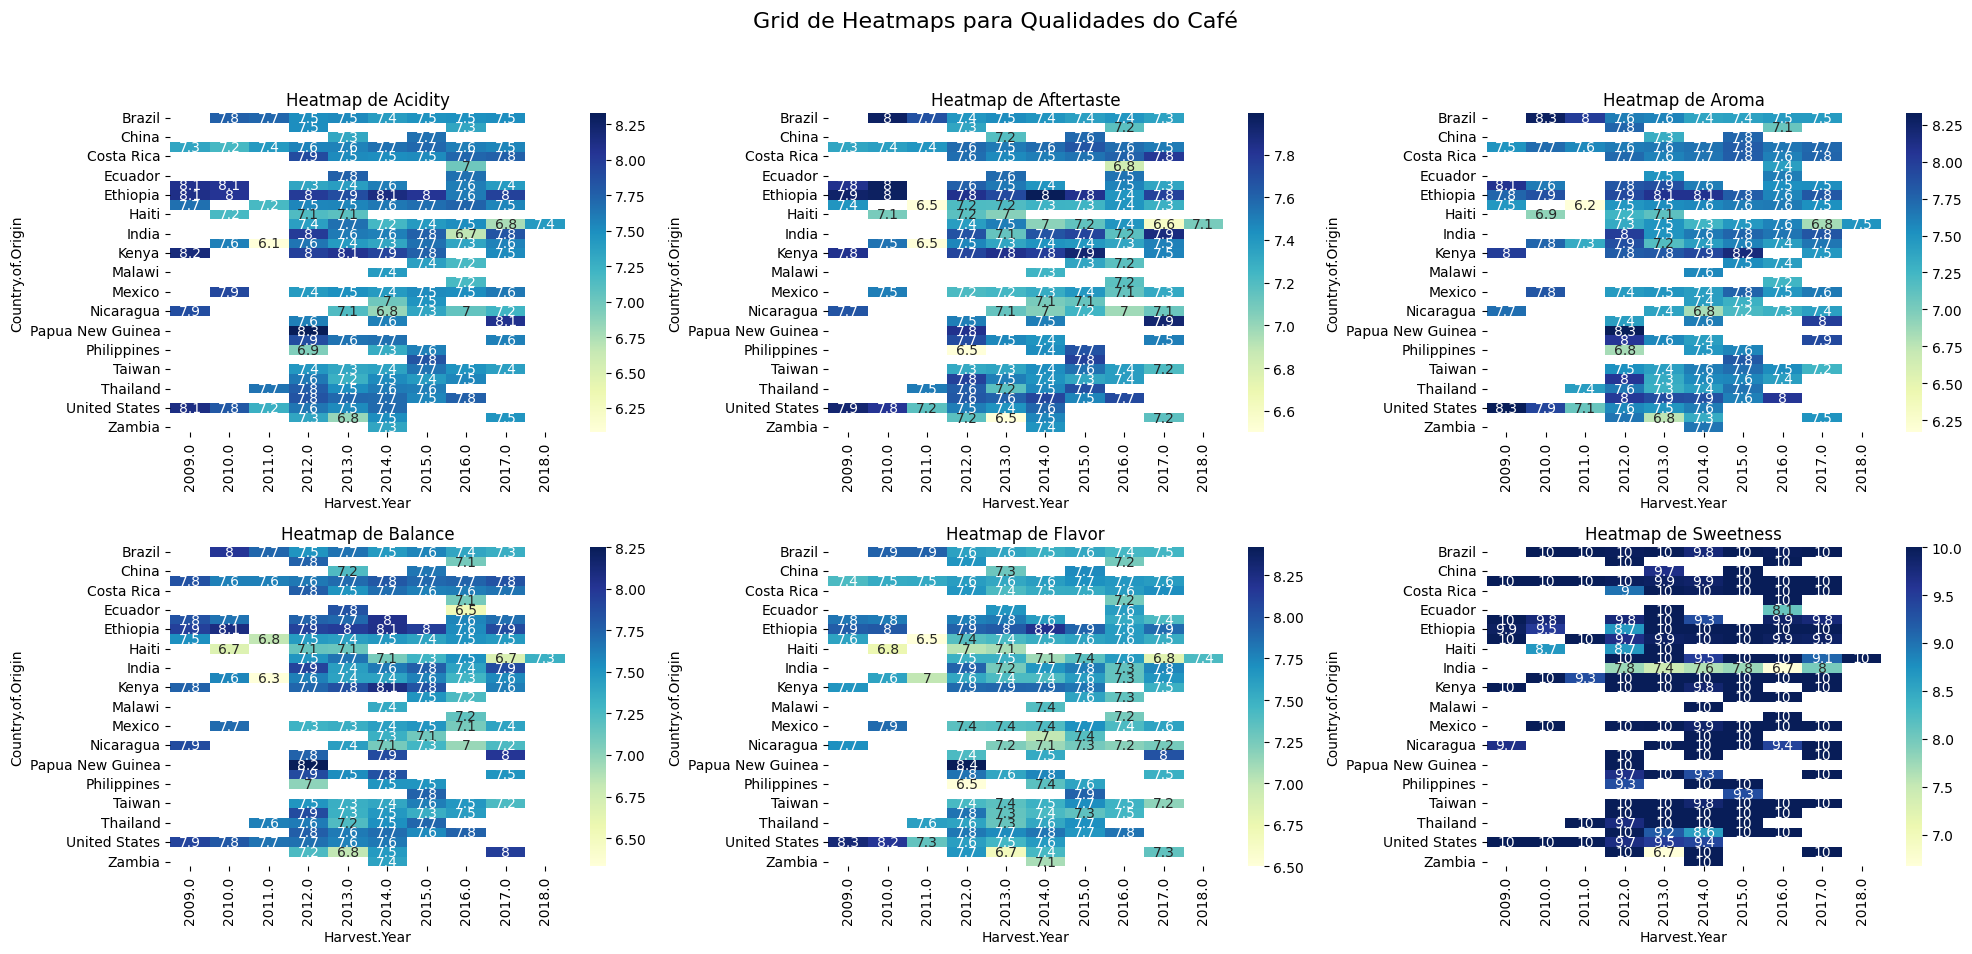

In [24]:
year_col = "Harvest.Year"
country_col = "Country.of.Origin"

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]

num_rows = 2 
num_cols = 3 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.suptitle("Grid de Heatmaps para Qualidades do Café", fontsize=16)

for i, attribute in enumerate(attributes):
    heatmap_data = coffee_quality.pivot_table(
        index=country_col, 
        columns=year_col, 
        values=attribute, 
        aggfunc="mean"
    )
    
    row = i // num_cols
    col = i % num_cols
    
    sns.heatmap(heatmap_data, ax=axes[row, col], cmap="YlGnBu", annot=True)
    axes[row, col].set_title(f"Heatmap de {attribute}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

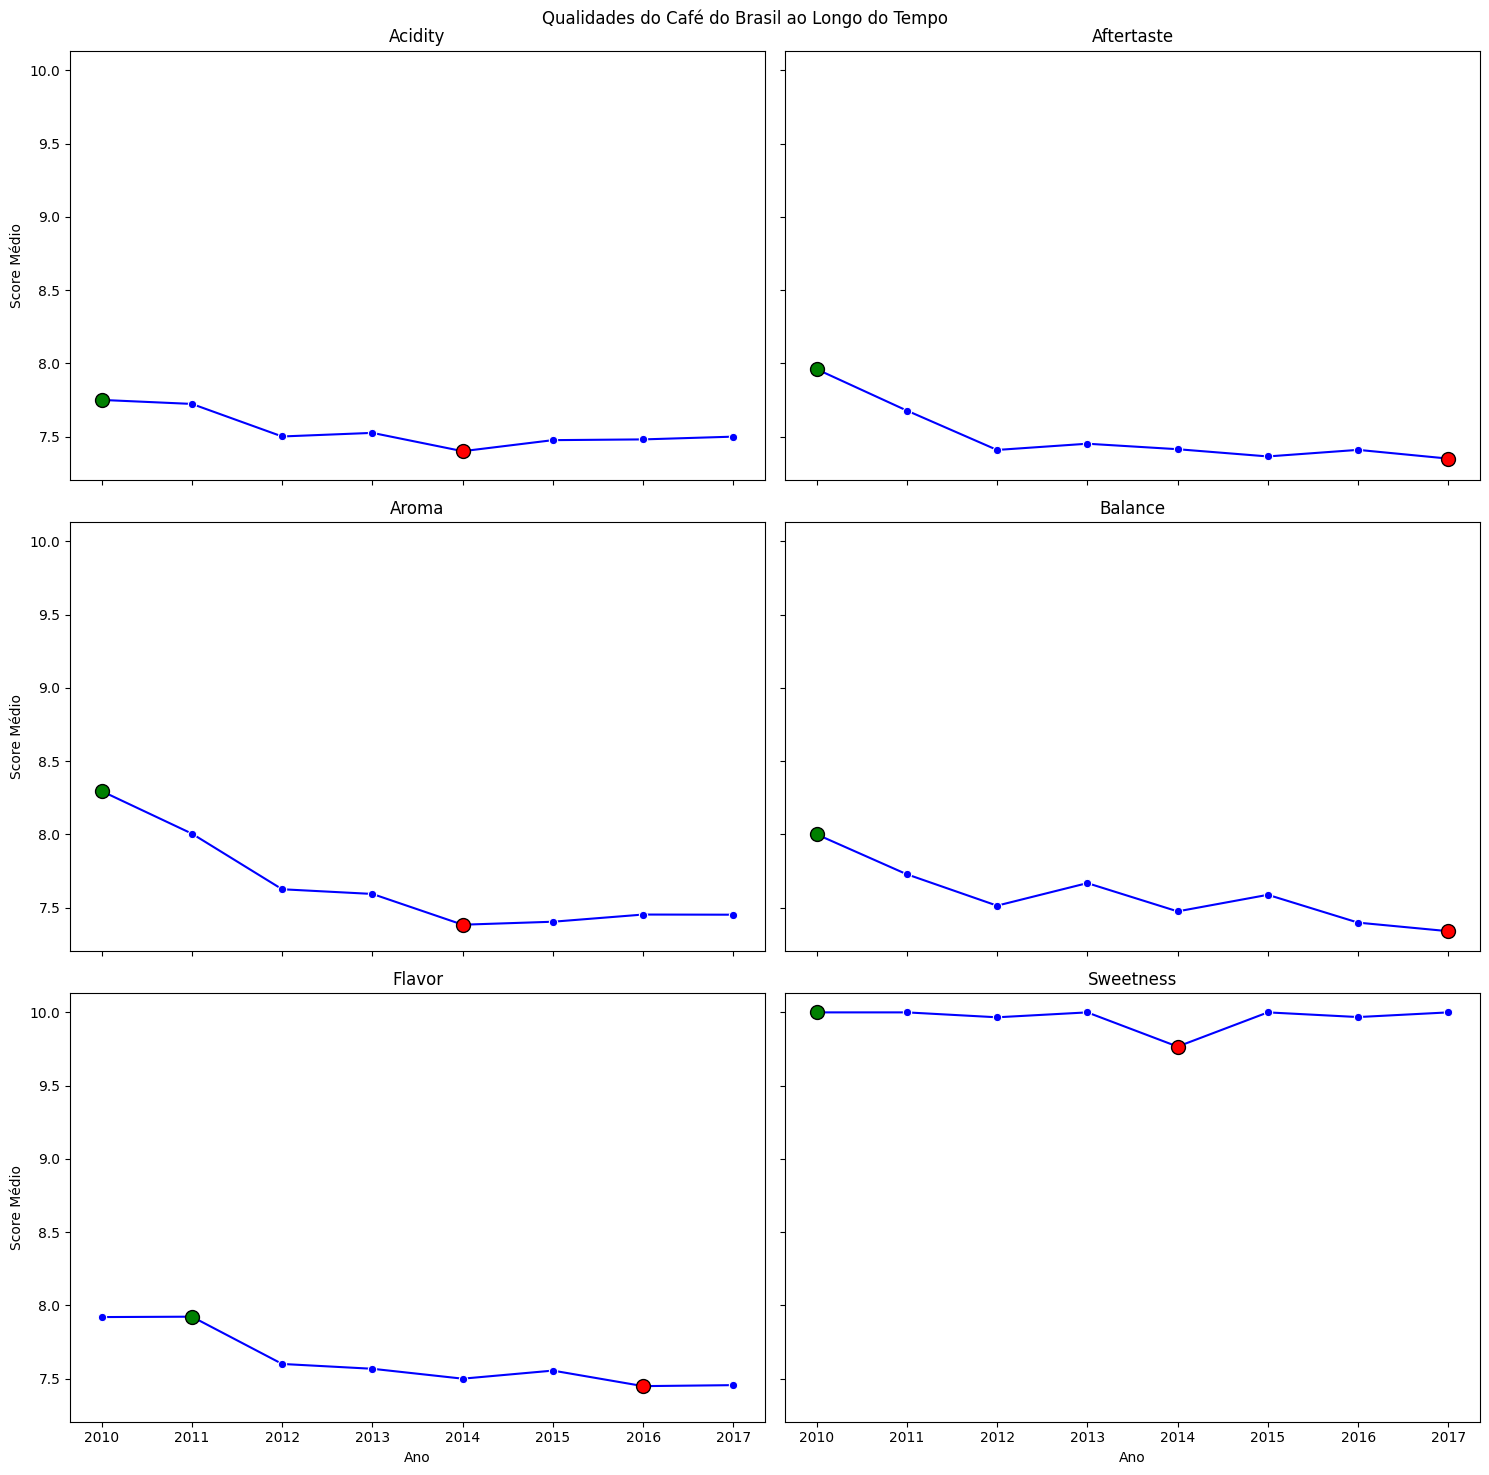

In [25]:
df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Qualidades do Café do Brasil ao Longo do Tempo")

for i, attribute in enumerate(attributes):
    ax = axes[i//2, i%2]  

    group_data = df_brazil.groupby("Harvest.Year")[attribute].mean()

    max_year = group_data.idxmax()
    min_year = group_data.idxmin()
    max_score = group_data.max()
    min_score = group_data.min()

    sns.lineplot(ax=ax, x=group_data.index, y=group_data.values, marker="o", color="blue")

    ax.scatter(max_year, max_score, color="green", s=100, edgecolor="black", zorder=5)

    ax.scatter(min_year, min_score, color="red", s=100, edgecolor="black", zorder=5)

    ax.set_title(attribute)
    ax.set_xlabel("Ano")
    ax.set_ylabel("Score Médio")

plt.tight_layout()
plt.show()

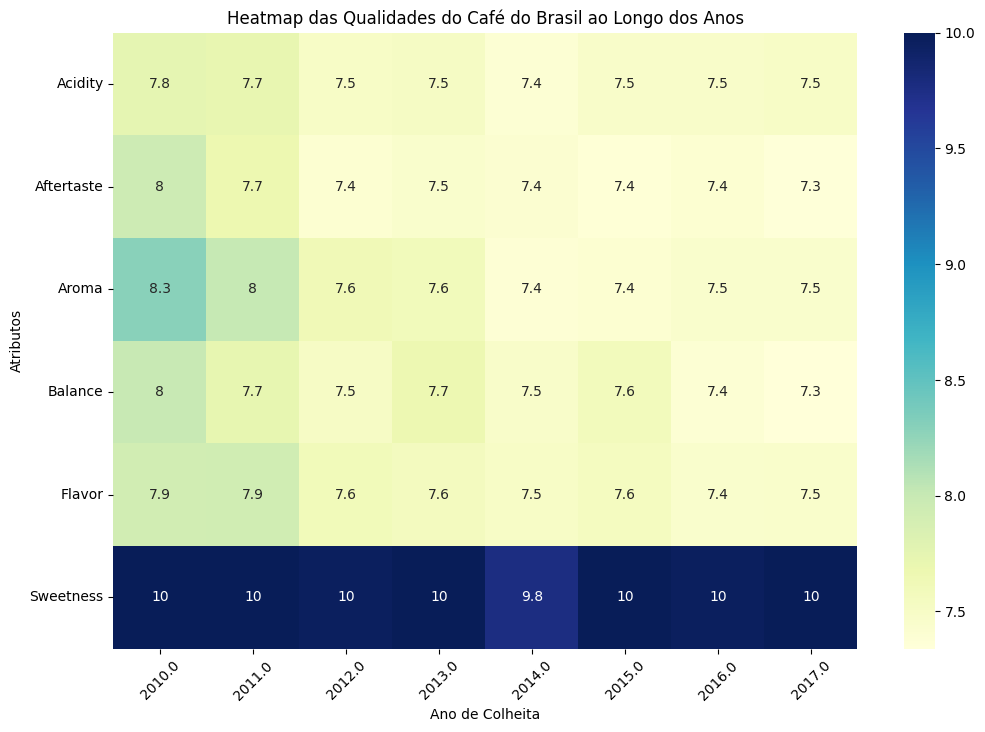

In [26]:
attributes = ["Acidity", "Aftertaste", "Aroma", "Balance", "Flavor", "Sweetness"]


df_brazil = coffee_quality[coffee_quality["Country.of.Origin"] == "Brazil"]

pivot_df = df_brazil.pivot_table(index="Harvest.Year", values=attributes, aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df.T, cmap="YlGnBu", annot=True)  
plt.title("Heatmap das Qualidades do Café do Brasil ao Longo dos Anos")
plt.xlabel("Ano de Colheita")
plt.ylabel("Atributos")
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.show()